In [7]:
import json
from StringIO import StringIO
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
import os
import sklearn as sk
from sklearn.linear_model import MultiTaskLasso, MultiTaskElasticNet, ElasticNet
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import sklearn.metrics as skmet
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords, names
import datetime
from scipy.stats import ttest_ind, f_oneway 
import csv

In [116]:
listings = pd.read_csv('Datasources/listings_augmented/listings_augmented_2018-05-23_V5.csv', low_memory = False)
listings = listings.drop(listings.index[4216:4219])

In [117]:
listings = listings.drop('distance_from_ocean', axis = 1)

In [122]:
#PAUL 5/26
lst2 = []
for i,k in zip(listings['latitude'],listings['longitude']):
    lon_diff = (float(k) + 117.235585)*np.pi/180
    lat_diff = (float(i) - 32.802458)*np.pi/180
    a = np.sin(lat_diff/2)**2 + np.cos(float(i)*np.pi/180)*np.cos(32.802458*np.pi/180)*(np.sin(lon_diff/2)**2)
    c = np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    d = 6371.00*float(c)
    lst2.append(d)

listings['distance_from_ocean'] = lst2

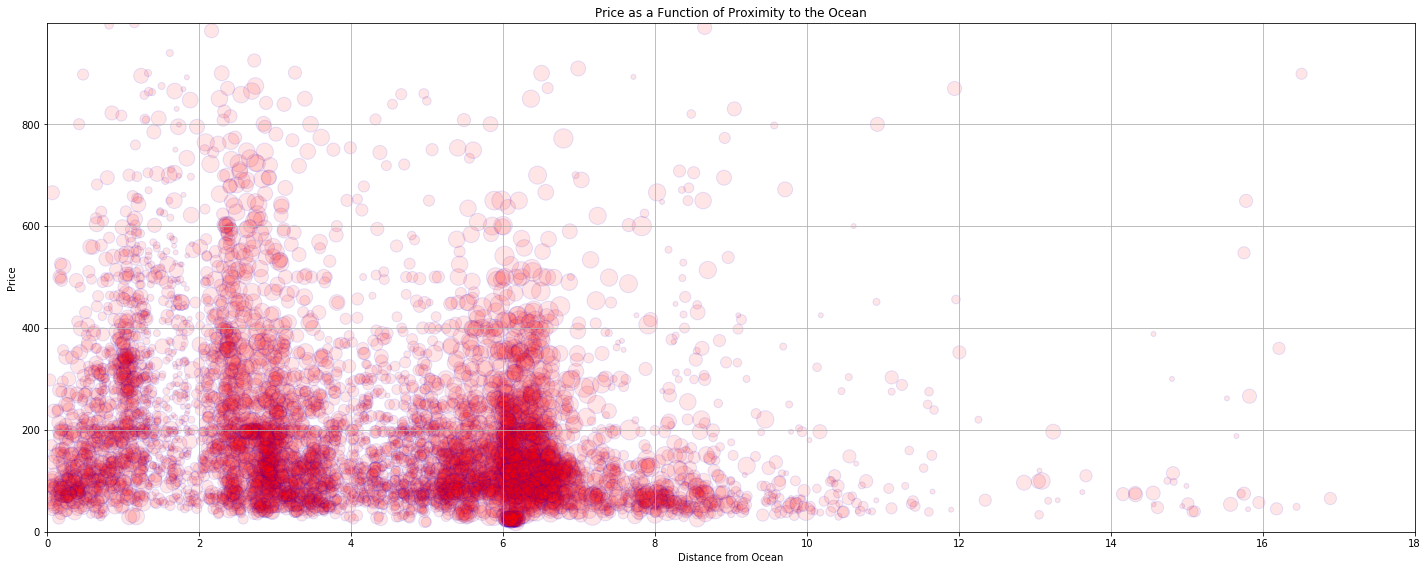

In [123]:
fig, ax = plt.subplots(figsize = (20, 8))
l = ax.scatter(listings_augmented_2018['distance_from_ocean'], listings_augmented_2018['price_y'],
              alpha = 0.1, c = 'r', edgecolors = 'b', marker = 'o', s=listings.park_count_1km*25)
#a, b = listings_augmented_2018['distance_from_ocean'].max(), listings_augmented_2018['price_y'].max()
ax.set_xlim((0, 18))
ax.set_ylim((0, b))
ax.set_xlabel('Distance from Ocean')
ax.set_ylabel('Price')
ax.set_title('Price as a Function of Proximity to the Ocean')
fig.tight_layout(pad=1)
ax.grid(True)
plt.show()

In [130]:
def map_variable(var):
    fig, ax = plt.subplots(figsize=(19,8))
    plt.scatter(listings_augmented_2018['longitude'],listings_augmented_2018['latitude'],
                c=listings_augmented_2018[var], cmap='Greys', alpha=.5)
    plt.colorbar()
    plt.show()

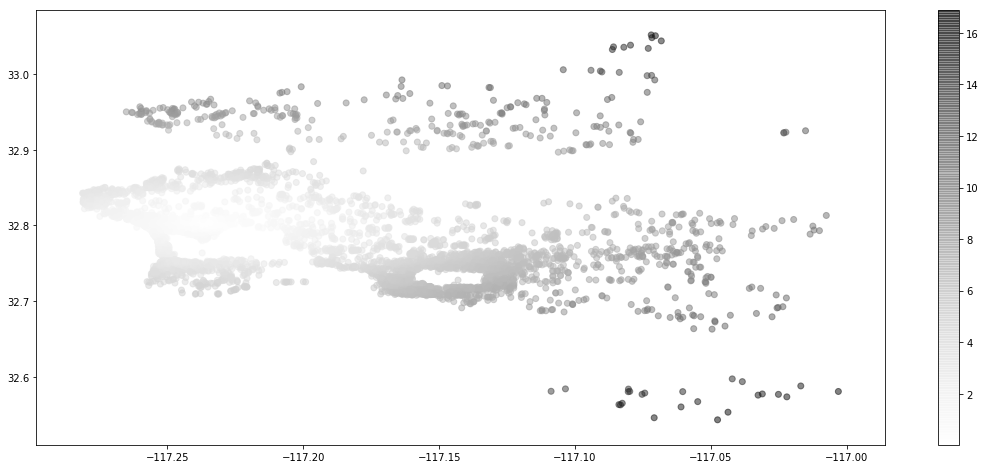

In [131]:
map_variable('distance_from_ocean')